In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('train.csv')

In [12]:
import data_preprocessor
from data_preprocessor import DataPreProcessor
instance = DataPreProcessor()
clean_data =  instance.cleanData(df_sales=data)

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(clean_data.sales, order=(3,3,3))
model_fit = model.fit()
print(model_fit.summary())

c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   47
Model:                 ARIMA(3, 3, 3)   Log Likelihood                -576.187
Date:                Sat, 11 May 2024   AIC                           1166.374
Time:                        07:53:45   BIC                           1178.863
Sample:                             0   HQIC                          1171.005
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0627      0.344     -3.087      0.002      -1.737      -0.388
ar.L2         -0.4884      0.428     -1.141      0.254      -1.327       0.350
ar.L3         -0.3333      0.125     -2.666      0.0

c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


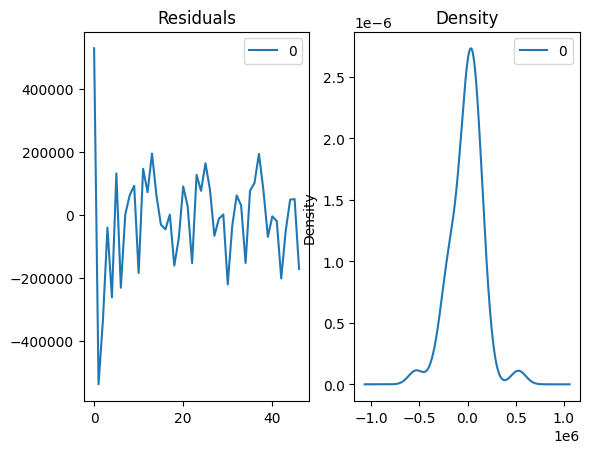

In [14]:
# import matplotlib.pyplot as plt
# # Plot residual errors
# residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

In [15]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = clean_data.sales[:70]
test = clean_data.sales[70:]

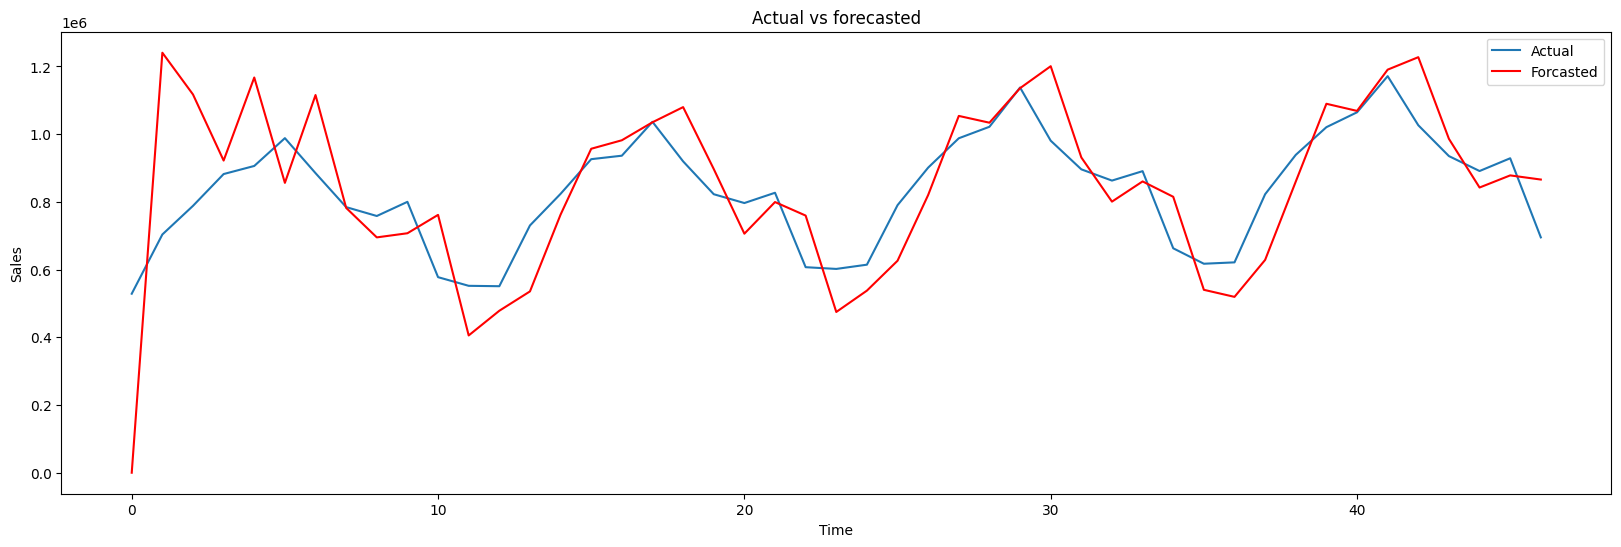

In [16]:
# Get the fitted values
fitted_values = model_fit.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(20, 6))
plt.plot(clean_data.sales, label='Actual')
plt.plot(fitted_values, color='red', label='Forcasted')
plt.title('Actual vs forecasted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# mae = mean_absolute_error(clean_data.sales, fitted_values)
mape = mean_absolute_percentage_error(clean_data.sales, fitted_values)
# maeM = np.mean(np.abs(fitted_values - clean_data)) 

# print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
# print("Mean Error (ME):", maeM)

Mean Absolute Percentage Error (MAPE): 0.1601535981493924


In [9]:
# Forecast
# n_periods = 24
# fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = np.arange(len(clean_data.sales), len(clean_data.sales)+n_periods)

# # make series for plotting purpose
# fc_series = pd.Series(fc, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(clean_data.sales)
# plt.plot(fc_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("Final Forecast of Usage")
# plt.show()


TypeError: Model.predict() missing 1 required positional argument: 'params'